In [39]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('canada_residency_data.csv')

In [111]:
data_menage_region = df[("Taille moyenne des ménages"!=df["Taille du ménage (8)"]) & ("Total - Type de construction résidentielle"!=df["Type de construction résidentielle (9)"])]

In [249]:
data_menage_region

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),COORDONNÉES,VALEUR
2,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison individuelle non attenante,Total - Taille du ménage,##############################################...,4945.0
4,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison jumelée,Total - Taille du ménage,##############################################...,200.0
6,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison en rangée,Total - Taille du ménage,##############################################...,105.0
8,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartement ou plain-pied dans un duplex,Total - Taille du ménage,##############################################...,160.0
10,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartement dans un immeuble de moins de cinq ...,Total - Taille du ménage,##############################################...,355.0
...,...,...,...,...,...,...,...
1727,2021.0,Nord-du-Québec,2021A00032499,Appartement dans un immeuble de moins de cinq ...,Total - Taille du ménage,2212-06-01,1780.0
1730,2021.0,Nord-du-Québec,2021A00032499,Autre maison individuelle attenante,Total - Taille du ménage,2212-08-01,25.0
1732,2021.0,Nord-du-Québec,2021A00032499,Logement mobile,Total - Taille du ménage,2212-09-01,920.0
1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
data_menage_region[data_menage_region["GÉO"] == "Abitibi"]

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),COORDONNÉES,VALEUR
1525,2021.0,Abitibi,2021A00032488,Maison individuelle non attenante,Total - Taille du ménage,2050-02-01,7485.0
1527,2021.0,Abitibi,2021A00032488,Maison jumelée,Total - Taille du ménage,2050-03-01,305.0
1529,2021.0,Abitibi,2021A00032488,Maison en rangée,Total - Taille du ménage,2050-04-01,220.0
1531,2021.0,Abitibi,2021A00032488,Appartement ou plain-pied dans un duplex,Total - Taille du ménage,2050-05-01,710.0
1533,2021.0,Abitibi,2021A00032488,Appartement dans un immeuble de moins de cinq ...,Total - Taille du ménage,2050-06-01,2015.0
1536,2021.0,Abitibi,2021A00032488,Autre maison individuelle attenante,Total - Taille du ménage,2050-08-01,50.0
1538,2021.0,Abitibi,2021A00032488,Logement mobile,Total - Taille du ménage,2050-09-01,160.0


In [108]:
total_region = data_menage_region[data_menage_region["VALEUR"] > 30000][["GÉO", "VALEUR"]]
total_region = total_region.sort_values(by=['VALEUR'],ascending=False)

<Axes: title={'center': 'Nombre de résidences en fonction des zones majeures'}, xlabel='GÉO', ylabel='nombre de residences'>

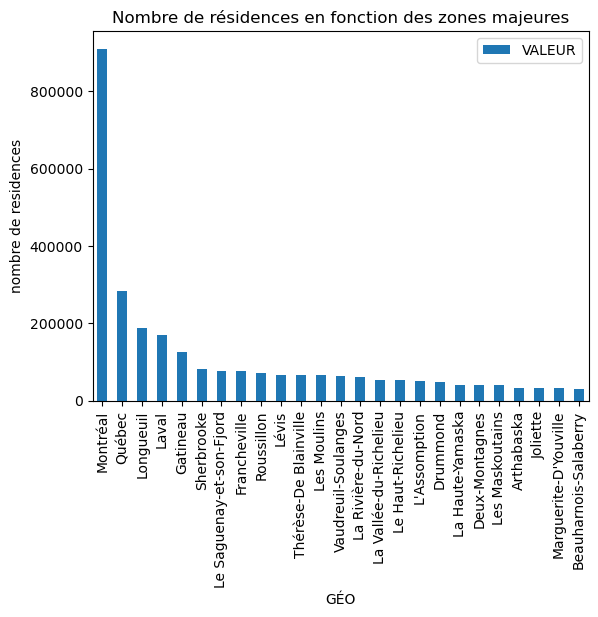

In [76]:
total_region.plot(kind = "bar", x = 'GÉO', title="Nombre de résidences en fonction des zones majeures", ylabel = "nombre de residences")

In [188]:
total_region = data_menage_region[data_menage_region["VALEUR"] > 10000][["Type de construction résidentielle (9)", "VALEUR"]]
total_region = total_region.sort_values(by=['VALEUR'],ascending=False)

In [189]:
total_by_category = total_region.groupby(['Type de construction résidentielle (9)']).sum()
total_by_category = total_by_category.sort_values(by=['VALEUR'],ascending=False)

<Axes: xlabel='Type de construction résidentielle (9)'>

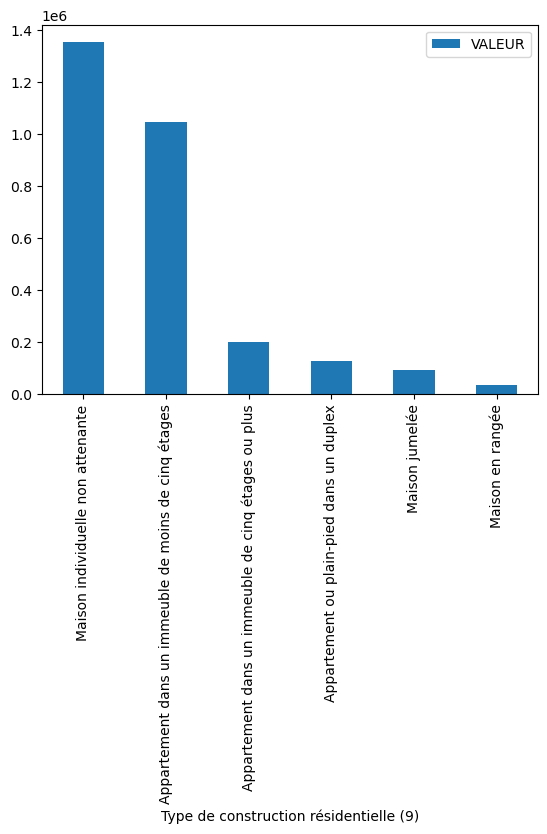

In [190]:
total_by_category.plot(kind = "bar")

In [237]:
total_region = data_menage_region[data_menage_region["VALEUR"] > 10000][["GÉO", "Type de construction résidentielle (9)", "VALEUR"]]
total_by_category = total_region.groupby(["GÉO",'Type de construction résidentielle (9)']).sum()

<Axes: title={'center': 'Nombre de résidences en fonction des zones majeures'}, xlabel='Type de construction résidentielle (9)', ylabel='nombre de residences'>

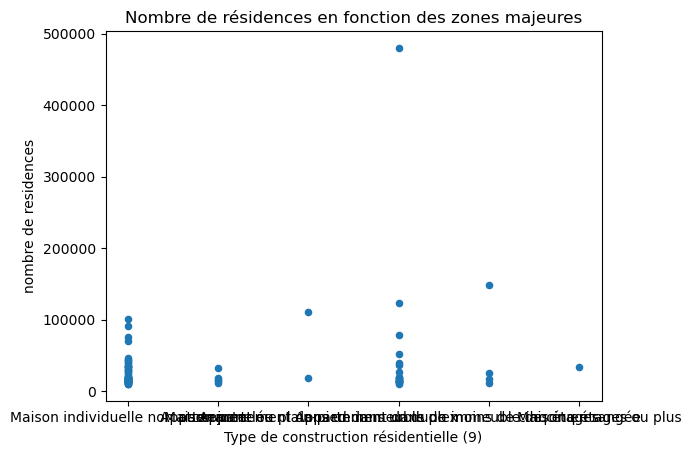

In [238]:
total_region.plot(kind = "scatter", x = 'Type de construction résidentielle (9)', y = "VALEUR",title="Nombre de résidences en fonction des zones majeures", ylabel = "nombre de residences")

In [239]:
total_by_region = total_region.groupby(["GÉO"]).sum()

In [240]:
max(total_by_region["VALEUR"])

906480.0

In [241]:
colors = {'Maison individuelle non attenante': 'orange', 'Appartement dans un immeuble de moins de cinq étages': 'purple','Maison jumelée': 'blue','Appartement dans un immeuble de cinq étages ou plus': 'yellow', 'Maison en rangée': 'green',"Appartement ou plain-pied dans un duplex" :"black"}

In [242]:
total_by_category

VALEUR
GÉO                   Type de construction résidentielle (9)                     
Antoine-Labelle       Maison individuelle non attenante                   13525.0
Argenteuil            Maison individuelle non attenante                   11445.0
Arthabaska            Maison individuelle non attenante                   19865.0
Beauce-Sartigan       Maison individuelle non attenante                   15610.0
Beauharnois-Salaberry Maison individuelle non attenante                   15860.0
...                                                                           ...
Sherbrooke            Maison individuelle non attenante                   29730.0
Thérèse-De Blainville Appartement dans un immeuble de moins de cinq é...  19510.0
                      Maison individuelle non attenante                   36450.0
Vaudreuil-Soulanges   Appartement dans un immeuble de moins de cinq é...  11800.0
                      Maison individuelle non attenante                   43635.0

[83 rows x 1 columns]

In [243]:
colors = {'Maison individuelle non attenante': 'orange', 'Appartement dans un immeuble de moins de cinq étages': 'purple','Maison jumelée': 'blue','Appartement dans un immeuble de cinq étages ou plus': 'yellow', 'Maison en rangée': 'green',"Appartement ou plain-pied dans un duplex" :"black"}
color_list = [colors[group[1]] for group in total_by_category.index.values]


In [244]:
total_by_category.index.values[0]

('Antoine-Labelle', 'Maison individuelle non attenante')

In [245]:
total_by_category.insert(1,"Rapport par région",total_by_category["VALEUR"]/total_by_region["VALEUR"])

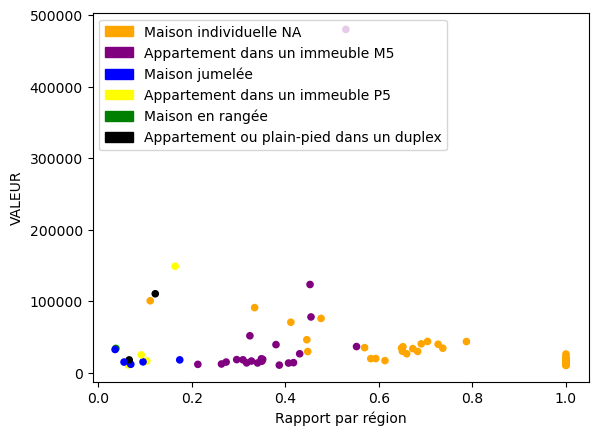

In [247]:
ax = total_by_category.plot(kind = "scatter", x = "Rapport par région", y = "VALEUR", c=color_list)
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['Maison individuelle non attenante'], label='Maison individuelle NA'),
    mpatches.Patch(color=colors['Appartement dans un immeuble de moins de cinq étages'], label='Appartement dans un immeuble M5'),
    mpatches.Patch(color=colors['Maison jumelée'], label='Maison jumelée'),
    mpatches.Patch(color=colors['Appartement dans un immeuble de cinq étages ou plus'], label='Appartement dans un immeuble P5'),
    mpatches.Patch(color=colors['Maison en rangée'], label='Maison en rangée'),
    mpatches.Patch(color=colors['Appartement ou plain-pied dans un duplex'], label='Appartement ou plain-pied dans un duplex'),# add as many as needed
]
ax.legend(handles=legend_handles,
          loc='upper left')

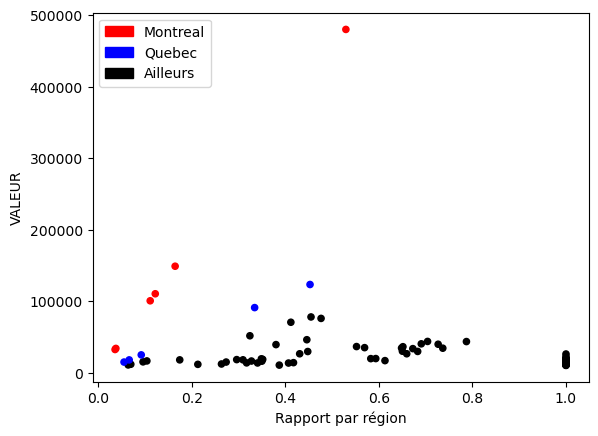

In [248]:
colors = {"Autre":"black","Montreal":"red","Quebec":"blue"}
color_list = ["blue" if group[0] == "Québec"  else "black"  if group[0] != "Montréal" else "red" for group in total_by_category.index.values]


ax = total_by_category.plot(kind = "scatter", x = "Rapport par région", y = "VALEUR", c=color_list)
legend_handles = [
    mpatches.Patch(color="red", label='Montreal'),
    mpatches.Patch(color="blue", label='Quebec'), # add as many as needed
    mpatches.Patch(color="black", label='Ailleurs'), # add as many as needed

]
ax.legend(handles=legend_handles,
          loc='upper left')

In [144]:
total_by_category[total_by_category["GÉO"] == "Abitibi"]

VALEUR
GÉO                 Type de construction résidentielle (9)                     
Abitibi             Appartement dans un immeuble de moins de cinq é...   2015.0
                    Appartement ou plain-pied dans un duplex              710.0
                    Autre maison individuelle attenante                    50.0
                    Logement mobile                                       160.0
                    Maison en rangée                                      220.0
...                                                                         ...
Vaudreuil-Soulanges Autre maison individuelle attenante                   180.0
                    Logement mobile                                       220.0
                    Maison en rangée                                     2665.0
                    Maison individuelle non attenante                   43635.0
                    Maison jumelée                                       2775.0

[754 rows x 1 columns]

In [146]:
total_by_category["VALEUR"]

GÉO                  Type de construction résidentielle (9)              
Abitibi              Appartement dans un immeuble de moins de cinq étages     2015.0
                     Appartement ou plain-pied dans un duplex                  710.0
                     Autre maison individuelle attenante                        50.0
                     Logement mobile                                           160.0
                     Maison en rangée                                          220.0
                                                                              ...   
Vaudreuil-Soulanges  Autre maison individuelle attenante                       180.0
                     Logement mobile                                           220.0
                     Maison en rangée                                         2665.0
                     Maison individuelle non attenante                       43635.0
                     Maison jumelée                                         